In [12]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)
from tensorflow.keras.applications.vgg19 import VGG19

In [13]:
# Load the Xception model
# https://keras.io/api/applications/xception/
model = Xception(include_top=True, weights = 'imagenet')
model2 = VGG19(include_top=True, weights = 'imagenet')

574717952/574710816 [==============================] - 49s 0us/step


In [4]:
# Default Image Size for Xception
image_size = (224,224)

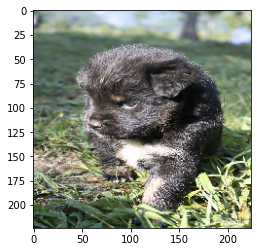

In [5]:
# Load the image and resize to the input dimensions that Xception
# was trained with
image_path = os.path.join("..", "Images", "pup.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [6]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

40960/35363 [==================================] - 0s 0us/step
Predicted [[('n02111277', 'Newfoundland', 0.19953014), ('n02104365', 'schipperke', 0.18259868), ('n02106382', 'Bouvier_des_Flandres', 0.16823946)]]


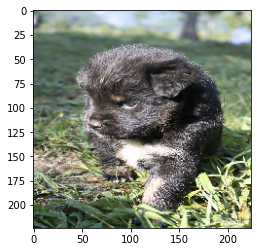

In [7]:
# Make predictions
prediction = model.predict(x)
print('Predicted', decode_predictions(prediction, top=3))
plt.imshow(img)

In [14]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    predictions2 = model2.predict(x)
    plt.imshow(img)
    print('Predicted Xception:', decode_predictions(predictions, top=3))
    print('Predicted VGG19:', decode_predictions(predictions2, top=3))

Predicted: [[('n02123394', 'Persian_cat', 0.41483355), ('n02123045', 'tabby', 0.24581636), ('n02123159', 'tiger_cat', 0.1349569)]]


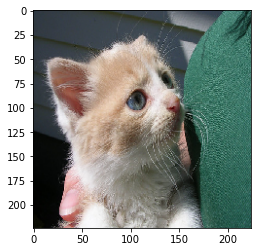

In [9]:
# Predict labels for new image
image_path = os.path.join("..", "Images", "kitten.jpg")
predict(image_path)

Predicted Xception: [[('n02123394', 'Persian_cat', 0.41483355), ('n02123045', 'tabby', 0.24581636), ('n02123159', 'tiger_cat', 0.1349569)]]
Predicted VGG19: [[('n03788365', 'mosquito_net', 0.13230143), ('n02804414', 'bassinet', 0.04170546), ('n04209239', 'shower_curtain', 0.03639931)]]


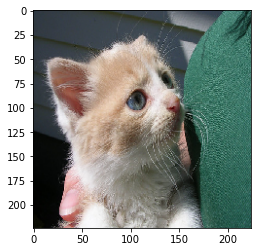

In [15]:
predict(image_path)